### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


### Load Cleaned Dataset

In [2]:
path = r"C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Cleaned\cleaned_house_prices.csv"
df = pd.read_csv(path)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


### Select Features for Clustering

In [3]:
# Select numeric features related to house characteristics
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'SalePrice']
X = df[features]

X.head()


,LotArea,OverallQual,OverallCond,GrLivArea,GarageCars,SalePrice
0,8450,7,5,1710,2,208500
1,9600,6,8,1262,2,181500
2,11250,7,5,1786,2,223500
3,9550,7,5,1717,3,140000
4,14260,8,5,2198,3,250000


### Standardize Data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Apply K-Means Clustering

In [5]:
# Use 3 clusters as example (can change)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show cluster counts
df['Cluster'].value_counts()


Cluster
1    592
2    582
0    256
Name: count, dtype: int64

### Visualize Clusters with PCA

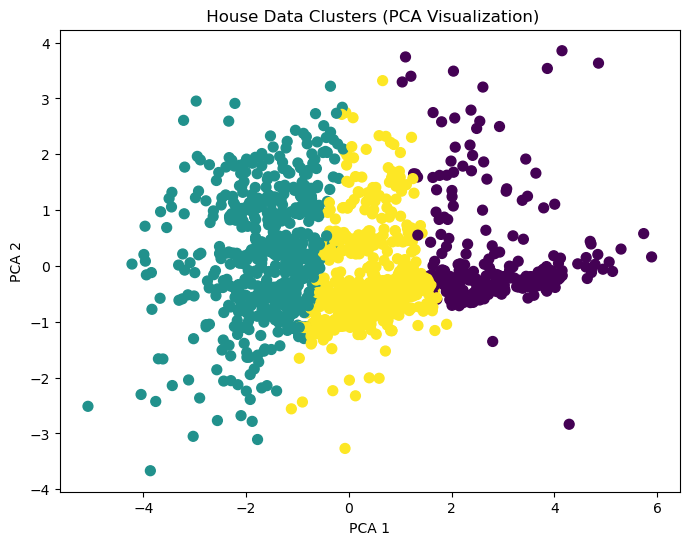

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=50)
plt.title(' House Data Clusters (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


### Analyze Cluster Centers

In [8]:
# Show mean values for each cluster
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
cluster_summary


,LotArea,OverallQual,OverallCond,GrLivArea,GarageCars,SalePrice
Cluster,,,,,,
0,13344.10,7.73,5.36,2108.93,2.55,287890.30
1,8320.88,4.99,5.94,1130.99,1.16,123188.84
2,9503.99,6.40,5.30,1586.53,1.99,180557.25


### Save Updated Dataset

In [9]:
df.to_csv(r"C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Cleaned\clustered_house_prices.csv", index=False)
print(" Clustered dataset saved successfully!")


 Clustered dataset saved successfully!


## 🧩 Conclusion

- Applied **K-Means clustering (3 clusters)** on key house features.
- Scaled the data for fair comparison across variables.
- Visualized clusters in 2D space using **PCA**.
- Each cluster represents houses with **similar quality, area, and price characteristics**.
- The clustered dataset was saved for further analysis.


### (Optional) Show Cluster Distribution

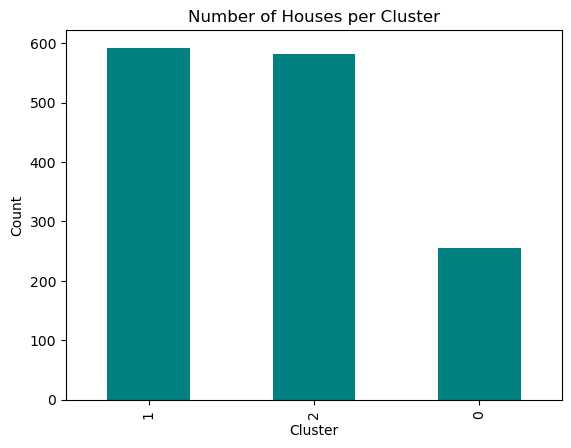

In [10]:
df['Cluster'].value_counts().plot(kind='bar', color='teal')
plt.title('Number of Houses per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
